In [1]:
import netStandalone
from utils import AG_v1
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

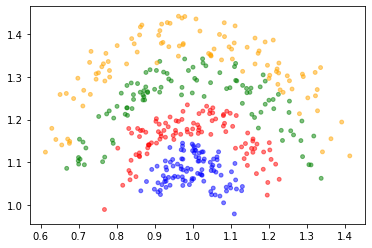

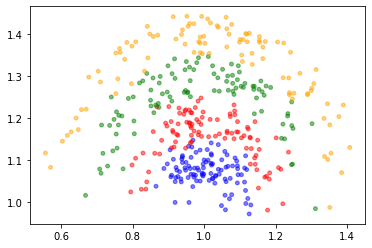

In [2]:
# np.random.seed(19680801)

COLOR_0 = 'blue'
COLOR_1 = 'red'
COLOR_2 = 'green'
COLOR_3 = 'orange'

N = 100
noise = 0.1

x = 4*[None]
y = 4*[None]
val_x = 4*[None]
val_y = 4*[None]
colors = 4*[None]
area = 15*np.ones(N)  # 0 to 15 point radii

p_x = 1
p_y = 1

r = 0.1
x[0] = 2*r*np.random.rand(N) -r
y[0] = np.sqrt(r**2 - x[0]*x[0]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[0] = 2*r*np.random.rand(N) -r
val_y[0] = np.sqrt(r**2 - val_x[0]*val_x[0]) + noise*(np.random.rand(N) - 0.5)
x[0] += p_x + noise*(np.random.rand(N) - 0.5)
y[0] += p_y
val_x[0] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[0] += p_y
colors[0] = COLOR_0

r = 0.2
x[1] = 2*r*np.random.rand(N) -r
y[1] = np.sqrt(r**2 - x[1]*x[1]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[1] = 2*r*np.random.rand(N) -r
val_y[1] = np.sqrt(r**2 - val_x[1]*val_x[1]) + noise*(np.random.rand(N) - 0.5)
x[1] += p_x + noise*(np.random.rand(N) - 0.5)
y[1] += p_y
val_x[1] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[1] += p_y
colors[1] = COLOR_1

r = 0.3
x[2] = 2*r*np.random.rand(N) -r
y[2] = np.sqrt(r**2 - x[2]*x[2]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[2] = 2*r*np.random.rand(N) -r
val_y[2] = np.sqrt(r**2 - val_x[2]*val_x[2]) + noise*(np.random.rand(N) - 0.5)
x[2] += p_x + noise*(np.random.rand(N) - 0.5)
y[2] += p_y
val_x[2] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[2] += p_y
colors[2] = COLOR_2

r = 0.4
x[3] = 2*r*np.random.rand(N) -r
y[3] = np.sqrt(r**2 - x[3]*x[3]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[3] = 2*r*np.random.rand(N) -r
val_y[3] = np.sqrt(r**2 - val_x[3]*val_x[3]) + noise*(np.random.rand(N) - 0.5)
x[3] += p_x + noise*(np.random.rand(N) - 0.5)
y[3] += p_y
val_x[3] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[3] += p_y
colors[3] = COLOR_3

plt.scatter(x[0], y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(x[1], y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(x[2], y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(x[3], y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

plt.scatter(val_x[0], val_y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(val_x[1], val_y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(val_x[2], val_y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(val_x[3], val_y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

In [3]:
pack_data_in = []
pack_rigth_outs = []
val_pack_data_in = []
val_pack_rigth_outs = []
for k in range(4):
    out = np.zeros(4)
    out[k] = 5
    for i in range(N):
        pack_data_in.append([x[k][i], y[k][i]])
        pack_rigth_outs.append(copy.deepcopy(out))
        val_pack_data_in.append([val_x[k][i], val_y[k][i]])
        val_pack_rigth_outs.append(copy.deepcopy(out))

my_ag = AG_v1.ag_handler(population_size = 150, n_ins =  2, n_outs = 4, net_imp = netStandalone.CPU)

Entrenamiento:


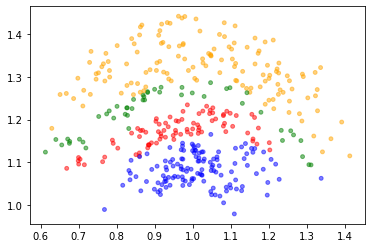

2021.9030465688556
Colores acertados 307/400
Validación:


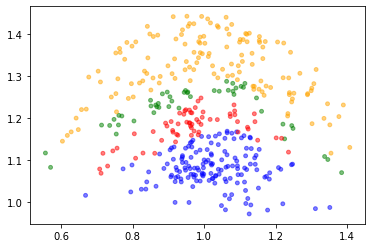

2038.7299178484827
Colores acertados 288/400


In [8]:
#Ordena y pinta el mejor

print("Entrenamiento:")
my_ag.screen(pack_data_in, pack_rigth_outs)
out = my_ag.exe_pack_best(pack_data_in)
color_out = []
colores_acertados = 0

for k in range(4):
    for i in range(int(len(out)/4)):
        aux = np.argsort(out[k*int(len(out)/4) + i])
        if aux[3] == k:
            colores_acertados += 1
        if aux[3] == 0:
            color_out.append(COLOR_0)
        if aux[3] == 1:
            color_out.append(COLOR_1)
        if aux[3] == 2:
            color_out.append(COLOR_2)
        if aux[3] == 3:
            color_out.append(COLOR_3)

p_x = np.concatenate((x[0],x[1],x[2],x[3]))
p_y = np.concatenate((y[0],y[1],y[2],y[3]))
plt.scatter(x, y, s=15, c=color_out, alpha=0.5)
plt.show()
print(my_ag.scores[my_ag.black_list[0]])
print("Colores acertados " + str(colores_acertados) + "/" + str(len(out)))


print("Validación:")
my_ag.screen(val_pack_data_in, val_pack_rigth_outs)
val_out = my_ag.exe_pack_best(val_pack_data_in)
val_color_out = []
colores_acertados = 0

for k in range(4):
    for i in range(int(len(out)/4)):
        aux = np.argsort(val_out[k*int(len(out)/4) + i])
        if aux[3] == k:
            colores_acertados += 1
        if aux[3] == 0:
            val_color_out.append(COLOR_0)
        if aux[3] == 1:
            val_color_out.append(COLOR_1)
        if aux[3] == 2:
            val_color_out.append(COLOR_2)
        if aux[3] == 3:
            val_color_out.append(COLOR_3)

v_x = np.concatenate((val_x[0],val_x[1],val_x[2],val_x[3]))
v_y = np.concatenate((val_y[0],val_y[1],val_y[2],val_y[3]))
plt.scatter(v_x, v_y, s=15, c=val_color_out, alpha=0.5)
plt.show()

print(my_ag.scores[my_ag.black_list[0]])
print("Colores acertados " + str(colores_acertados) + "/" + str(len(out)))


In [7]:
#Aprende
I = 10
best_perf = [my_ag.scores[my_ag.black_list[0]]]

for i in tqdm(range(I)):
    my_ag.learn(pack_data_in, pack_rigth_outs)
    my_ag.screen(pack_data_in, pack_rigth_outs)
    best_perf.append(my_ag.scores[my_ag.black_list[0]])

print(best_perf)

100%|██████████| 10/10 [05:14<00:00, 31.44s/it]

[2231.4478349387646, 2210.3961099125445, 2189.5497963679954, 2169.1302170222625, 2144.974449359579, 2121.462247470394, 2095.4292685724795, 2078.163904797286, 2057.922373767942, 2034.236881678924, 2021.9030465688556]
